In [2]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.linear_model import LinearRegression
from tqdm.keras import TqdmCallback

#Data Import
df = pd.read_csv('Bikes.csv', encoding= 'unicode_escape')
X, y = df.drop(['Bikes'], axis =1), df['Bikes']

def coeff_determination(y, yhat):
    """ Calculates the R2"""
    from keras import backend as K
    SS_res = K.sum(K.square(y-yhat))
    SS_tot = K.sum(K.square(y -K.mean(yhat)))
    return (1-SS_res/(SS_tot + K.epsilon()))

def r2_adjusted(x, r2):
    """Calculates the R2 Adjusted"""
    #no. instances, params
    m, n = x.shape
    #calculate r_df
    r_df = (m-1)/(m-n)
    return 1-(r_df*(1-r2))
              
def FourL_NN(num_feat, act, epoch, learnrate):
    """ Creates the Sequential Model as dataset has one output, inputs are placed in the model
    followed by 2 hidden layers and then output layer. The optimizer used for the NN is Adam.
    A plot of MSE vs Epochs and R2 vs Epochs is printed at the end. R2, R2 Bar and R2 CV are returned.
    """
    model = Sequential()
    model.add(Input(shape=(num_feat,)))         #Input Layer
    model.add(Dense(units=24, activation=act))  #Hidden Layer 1
    model.add(Dense(units=24, activation=act))  #Hidden Layer 2
    model.add(Dense(units=1))                   #Output Layer
    optimizer = Adam(learning_rate=learnrate)   #Adam used as Optimizer
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse', coeff_determination])
    fit_model = model.fit(x=x_train, y=y_train, epochs=epoch, batch_size=32, validation_split=0.2, verbose=0, callbacks=[TqdmCallback()])
    plt.clf()
    plt.plot([i for i in range(epoch)], fit_model.history['mse'], label="mse")
    plt.title(f"{act}: {learnrate}")
    plt.legend()
    plt.show()
    plt.plot([i for i in range(epoch)], fit_model.history['coeff_determination'], label="R2")
    plt.legend()
    return (fit_model.history['coeff_determination'][-1], r2_score(y_test, model(x_test)), r2_adjusted(x_train,fit_model.history['coeff_determination'][-1]))

# 4 Layer Model

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

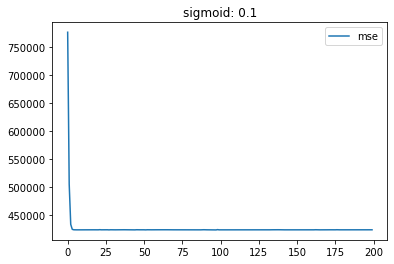

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

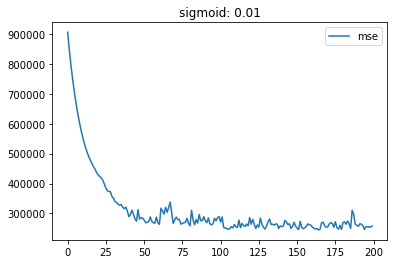

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

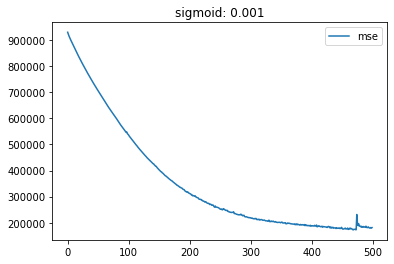

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

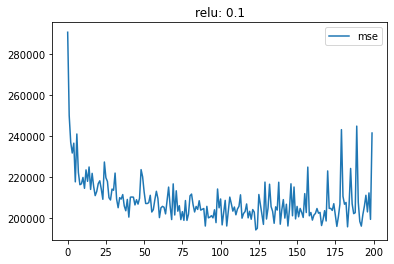

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

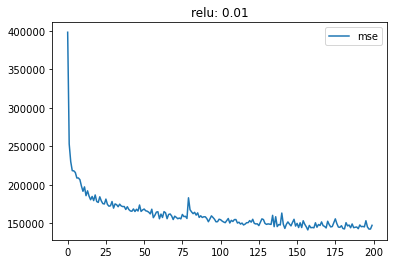

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

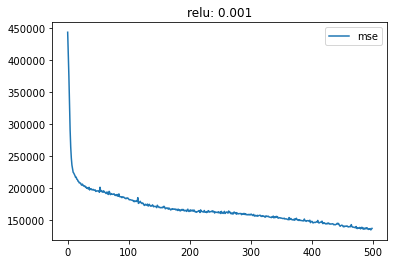

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

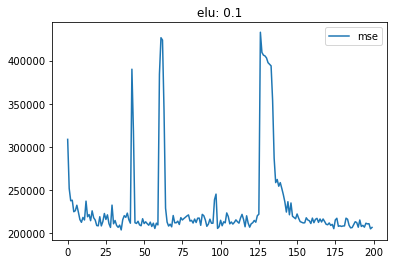

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

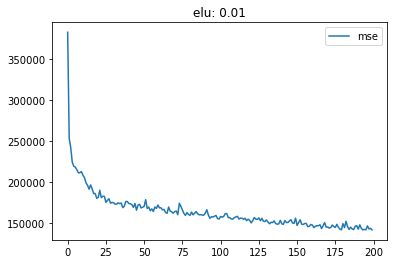

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

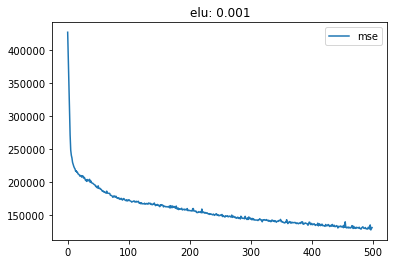

,Learning Rate,R2,R2 CV,R2 Adjusted
sigm,0.001,0.000000,-0.002266,-0.001430
sigm,0.010,0.384433,0.403236,0.383553
sigm,0.100,0.560498,0.553310,0.559870
relu,0.001,0.420477,0.339963,0.419649
relu,0.010,0.623527,0.618848,0.622989
relu,0.100,0.666640,0.613223,0.666163
elu,0.001,0.503256,0.504111,0.502546
elu,0.010,0.648599,0.615523,0.648097
elu,0.100,0.670766,0.676281,0.670295


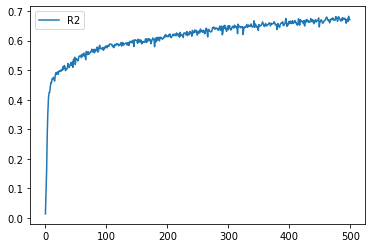

In [3]:
#Splitting training and testing sets (80/20)
x_train, y_train = X[-7006:].to_numpy(), (y[-7006:]).to_numpy()
x_test, y_test   = X[:-7006].to_numpy(), (y[:-7006]).to_numpy()

#Calling Neural Net Function for 3 different activation functions and 3 different learning rates.
sig1, sig_cv1, sig_bar1 = FourL_NN(11, 'sigmoid', 200, 0.1)
sig2, sig_cv2, sig_bar2 = FourL_NN(11, 'sigmoid', 200, 0.01)
sig3, sig_cv3, sig_bar3 = FourL_NN(11, 'sigmoid', 500, 0.001)
 
relu1, relu_cv1, relu_bar1 = FourL_NN(11, 'relu', 200, 0.1)
relu2, relu_cv2, relu_bar2 = FourL_NN(11, 'relu', 200, 0.01)
relu3, relu_cv3, relu_bar3 = FourL_NN(11, 'relu', 500, 0.001)

elu1, elu_cv1, elu_bar1 = FourL_NN(11, 'elu', 200, 0.1)
elu2, elu_cv2, elu_bar2 = FourL_NN(11, 'elu', 200, 0.01)
elu3, elu_cv3, elu_bar3 = FourL_NN(11, 'elu', 500, 0.001)

#Output
R2s = pd.DataFrame({"Learning Rate" :[0.1,.01,0.001, 0.1,.01,0.001, 0.1,.01,0.001], 
               "R2":[sig1, sig2, sig3, relu1, relu2, relu3, elu1, elu2, elu3],
               "R2 CV":[sig_cv1, sig_cv2, sig_cv3, relu_cv1, relu_cv2, relu_cv3, elu_cv1, elu_cv2, elu_cv3],
               "R2 Adjusted":[sig_bar1,sig_bar2,sig_bar3,relu_bar1,relu_bar2,relu_bar3,elu_bar1,elu_bar2,elu_bar3]},
               index = ["sigm", "sigm", "sigm", "relu","relu","relu","elu", "elu", "elu"])
R2s

# Forward 4 Layer Model

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

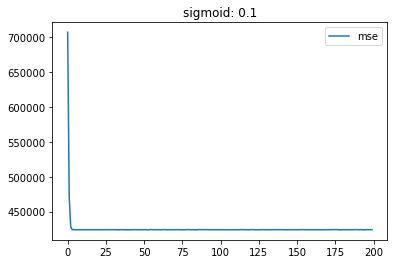

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

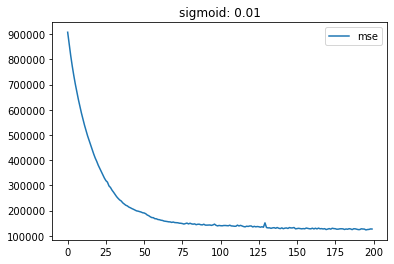

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

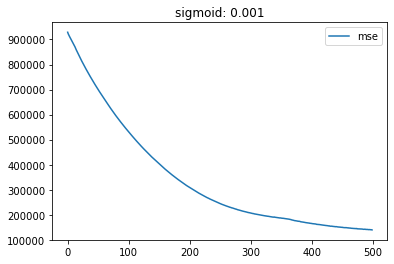

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

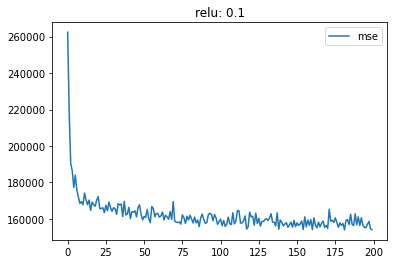

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

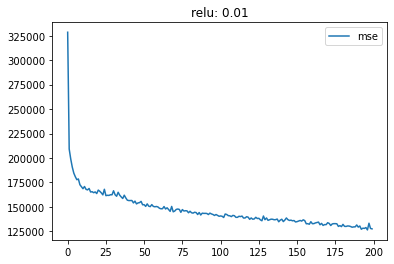

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

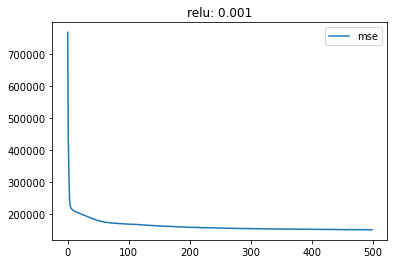

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

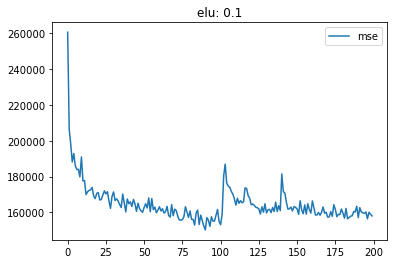

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

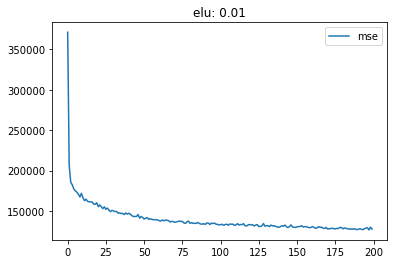

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

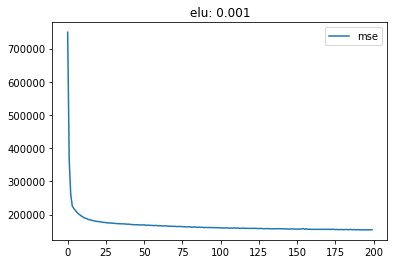

,Learning Rate,R2,R2 CV,R2 Adjusted
sigm,0.100,0.000000,-0.001462,-0.000571
sigm,0.010,0.685114,0.683007,0.684934
sigm,0.001,0.668040,0.650572,0.667850
relu,0.100,0.625618,0.592627,0.625404
relu,0.010,0.689389,0.669759,0.689212
relu,0.001,0.633388,0.621595,0.633178
elu,0.100,0.606395,0.608192,0.606170
elu,0.010,0.686263,0.671140,0.686083
elu,0.001,0.610337,0.613021,0.610114


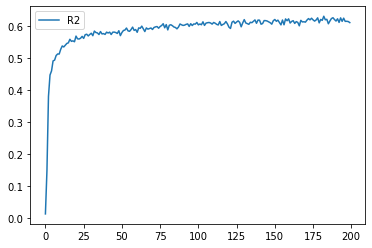

In [5]:
#Selecting features to feed the NN with forward selection and splitting training and testing sets (80/20)
reg = LinearRegression() 
sfs = SequentialFeatureSelector(estimator=reg)
sfs.fit(X,y)
forward = sfs.transform(X)
x_train, y_train = forward[-7006:], (y[-7006:]).to_numpy()
x_test, y_test   = forward[:-7006], (y[:-7006]).to_numpy()

#Calling Neural Net Function for 3 different activation functions and 3 different learning rates.
sig1, sig_cv1, sig_bar1 = FourL_NN(5, 'sigmoid', 200, 0.1)
sig2, sig_cv2, sig_bar2 = FourL_NN(5, 'sigmoid', 200, 0.01)
sig3, sig_cv3, sig_bar3 = FourL_NN(5, 'sigmoid', 500, 0.001)

relu1, relu_cv1, relu_bar1 = FourL_NN(5, 'relu', 200, 0.1)
relu2, relu_cv2, relu_bar2 = FourL_NN(5, 'relu', 200, 0.01)
relu3, relu_cv3, relu_bar3 = FourL_NN(5, 'relu', 500, 0.001)

elu1, elu_cv1, elu_bar1 = FourL_NN(5, 'elu', 200, 0.1)
elu2, elu_cv2, elu_bar2 = FourL_NN(5, 'elu', 200, 0.01)
elu3, elu_cv3, elu_bar3 = FourL_NN(5, 'elu', 200, 0.001)

#Output
forward_R2s = pd.DataFrame({"Learning Rate" :[0.1,.01,0.001, 0.1,.01,0.001, 0.1,.01,0.001], 
               "R2":[sig1, sig2, sig3, relu1, relu2, relu3, elu1, elu2, elu3],
               "R2 CV":[sig_cv1, sig_cv2, sig_cv3, relu_cv1, relu_cv2, relu_cv3, elu_cv1, elu_cv2, elu_cv3],
               "R2 Adjusted":[sig_bar1,sig_bar2,sig_bar3,relu_bar1,relu_bar2,relu_bar3,elu_bar1,elu_bar2,elu_bar3]},
               index = ["sigm", "sigm", "sigm", "relu","relu","relu","elu", "elu", "elu"])

forward_R2s